In [1]:
## Blind Source Separation ICA with sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

In [2]:
# Generate sample data
np.random.seed(0)
n_samples = 2000  # x-axis
time      = np.linspace(0,8,n_samples)  # y-axis

In [4]:
s1 = np.sin(2*time)           # signal 1: sinusodial signal
s2 = np.sign(np.sin(3*time))  # signal2: square signal
s3 = signal.sawtooth(2*np.pi*time)

In [5]:
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # add noise

In [6]:
# Standardize data
S /= S.std(axis=0) 

# Mix data
A = np.array([[1, 1, 1],[0.5, 2, 1],[1.5, 1, 2]]) # mixing matrix
X = np.dot(S, A.T)                                # generate observations

In [8]:
# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)   # reconstruct signals
A_ = ica.mixing_            # get estimated mixing matrix

In [9]:
# Prove that ICA model applies by reverting the unmixing
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

In [10]:
# Compute PCA for comparison
pca = PCA(n_components=3)
H   = pca.fit_transform(X)  # reconstruct signals based on orthogonal components

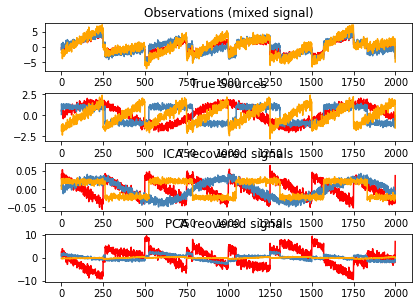

In [13]:
# Plot results
plt.figure()

models = [X, S, S_, H]
names  = ['Observations (mixed signal)',
          'True Sources',
          'ICA recovered signals',
          'PCA reovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
  plt.subplot(4,1,ii)
  plt.title(name)
  for sig, color in zip(model.T, colors):
    plt.plot(sig, color=color)
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()